<a href="https://colab.research.google.com/github/RoseMwangi98/CUSTOMER_SEGMENTATION/blob/main/Wholesale_Customer_segmentation_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wholesale Customer Segmentation project

## Defining the question

### a) Specifying the analysis question

Build an unsupervised machine learning model that is able to cluster wholesale customers into groups based on their shared characteristics

### b) Defining the metric for success

Be able to effectively use kmeans algorithm to build an unsupervised machine learning model, obtain insights and successfully deploy the model

### c) Understanding the context


### d) Recording the experimental design

- Obtain our dataset
- Define the appropriateness of the available data to answer the given question
- Find and deal with outliers, anomalies, and missing data within the dataset
- Perform Exploratory Data Analysis
- Data normalization and feature selection
- Build a unsupervised machine learning model 
- Make conclusions and give recommendations

### e) Data Relevance

The dataset contains adequate information to build our model

### f) Data description

- FRESH: annual expense on fresh products
- MILK: annual expense on dairy products
- GROCERY: annual expense on grocery products
- FROZEN: annual expenditure on frozen products
- DETERGENTS_PAPER: Annual expenditure on detergents and paper products 
- DELICATESSEN: annual expense on delicatessen products 
- CHANNEL: Customer channel - Horeca (Hotel / Restaurant / Café) or Retail channel
- REGION: Client region - Lisnon, Porto or Others

## Loading and checking the data

In [ ]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
# Loading the dataset

whole = pd.read_csv('Wholesale customers data.csv')
whole.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
# Getting the shape of the dataset

whole.shape

(440, 8)

In [ ]:
# Checking the column names

whole.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [ ]:
# Checking on the data structure of the dataset

whole.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
# Describing the quantitative variables

whole.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## Data Cleaning

In [ ]:
# Checking if there are any null values

whole.isna().sum()

# There are no null values

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [ ]:
# Checking if there are any duplicates

whole.duplicated().sum()

# There are no duplicates in the data

0

In [ ]:
# Getting rid of any white spaces in the column names

whole.columns = whole.columns.str.strip()
whole.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
whole.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

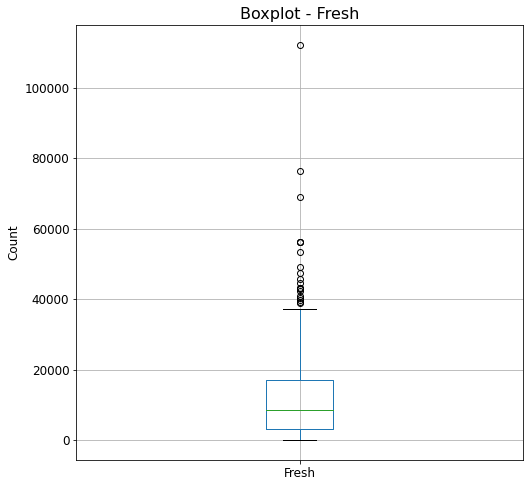

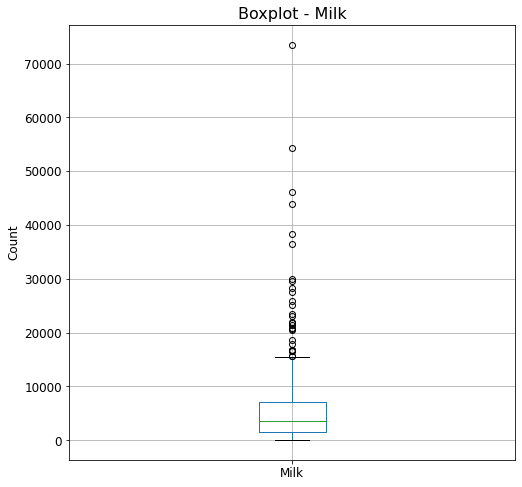

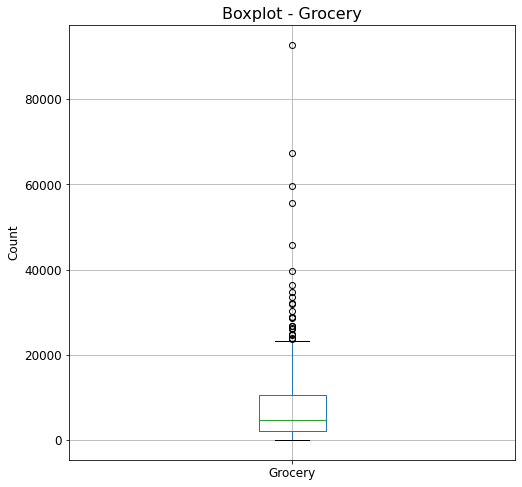

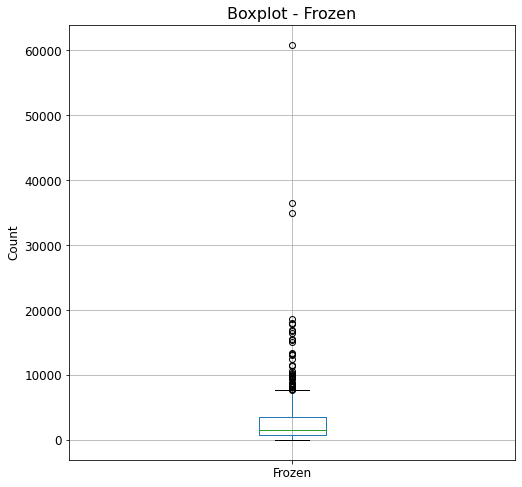

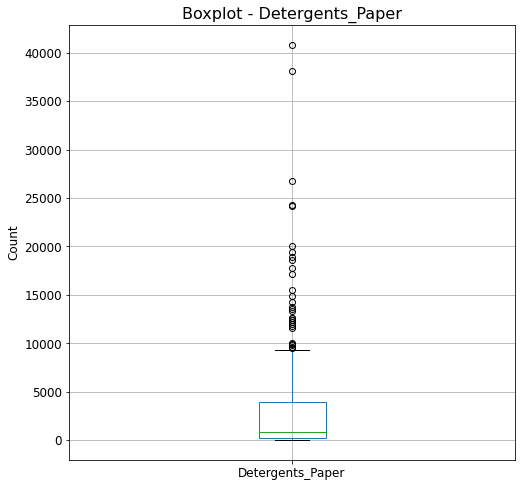

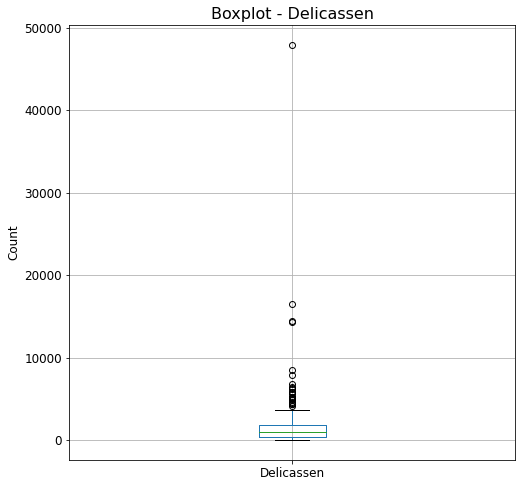

In [ ]:
# Checking for outliers using boxplots

cols = ['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']

for column in cols:
    plt.figure(figsize= (8,8))
    whole.boxplot([column], fontsize= 12)
    plt.ylabel('Count', fontsize = 12)
    plt.title('Boxplot - {}'.format(column), fontsize = 16)
    

In [ ]:
# Making a copy of the dataset

df = whole.copy()

In [ ]:
# Looking at the unique values in the Channel and region columns

print(whole['Channel'].value_counts())
print(whole['Region'].value_counts())

1    298
2    142
Name: Channel, dtype: int64
3    316
1     77
2     47
Name: Region, dtype: int64


In [ ]:
# Naming the categories in the Channel column

def channel(x): 
    if (x == 1) :
        return 'Horeca'
    else:
        return 'Retail'

df['Channel'] = df['Channel'].apply(channel)
df.head() 

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,Retail,3,12669,9656,7561,214,2674,1338
1,Retail,3,7057,9810,9568,1762,3293,1776
2,Retail,3,6353,8808,7684,2405,3516,7844
3,Horeca,3,13265,1196,4221,6404,507,1788
4,Retail,3,22615,5410,7198,3915,1777,5185


In [ ]:
# Naming the categories in the Region column

def region(x): 
    if (x == 1) :
        return 'Lisbon'
    elif (x == 2):
        return 'Oporto'
    else:
        return 'Other Regions'

df['Region'] = df['Region'].apply(region)
df.head() 

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,Retail,Other Regions,12669,9656,7561,214,2674,1338
1,Retail,Other Regions,7057,9810,9568,1762,3293,1776
2,Retail,Other Regions,6353,8808,7684,2405,3516,7844
3,Horeca,Other Regions,13265,1196,4221,6404,507,1788
4,Retail,Other Regions,22615,5410,7198,3915,1777,5185


## Exploratory Data Analysis

### Univariate Analysis

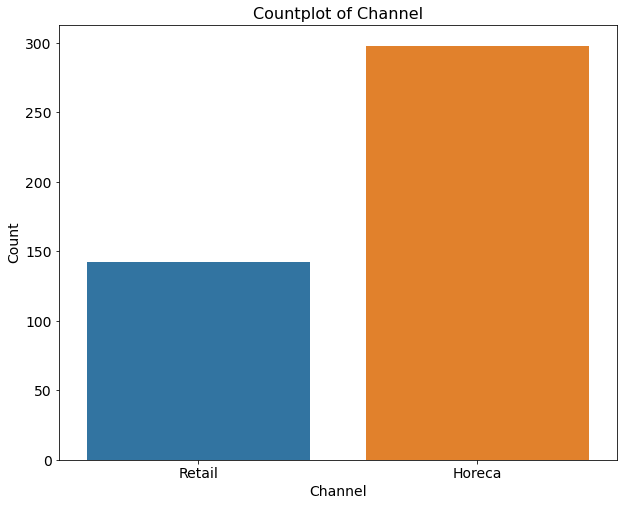

In [ ]:
# Countplot of the channel column

plt.figure(figsize = (10,8))
sns.countplot(x = df['Channel'])
plt.title('Countplot of Channel', fontsize = 16)
plt.xlabel('Channel', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

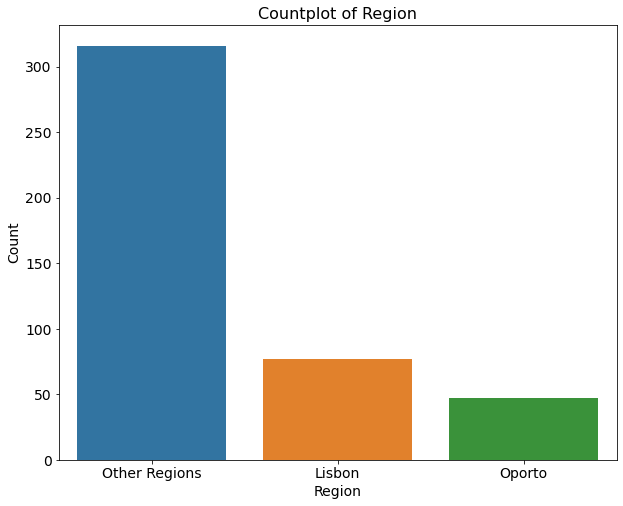

In [ ]:
# Countplot of the channel column

plt.figure(figsize = (10,8))
sns.countplot(x = df['Region'])
plt.title('Countplot of Region', fontsize = 16)
plt.xlabel('Region', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [ ]:
cols

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

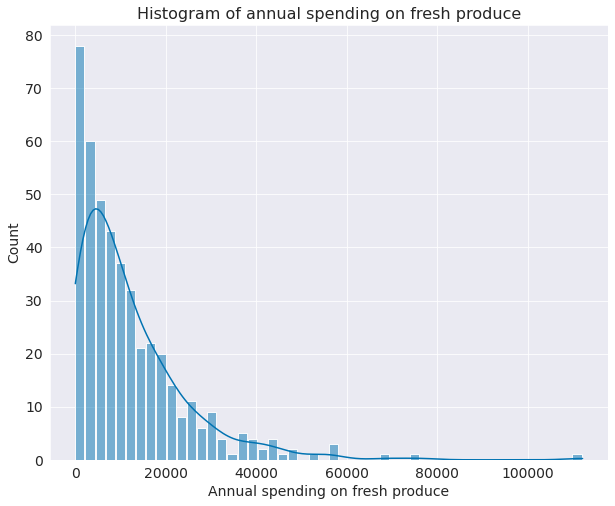

In [ ]:
# Univariate analysis for the numerical variables
# Histogram on Fresh column

def histogram(var1, bins):
  plt.figure(figsize= (10,8)),
  sns.set_style('darkgrid'),
  sns.set_palette('colorblind'),
  sns.histplot(x = var1, data=df,  bins = bins , shrink= 0.9, kde = True)

histogram('Fresh', 50)
plt.title('Histogram of annual spending on fresh produce', fontsize = 16)
plt.xlabel('Annual spending on fresh produce', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [ ]:
# Measure of central tendancy

df['Fresh'].describe()

# Wholesalers spend as much as $112151 on fresh products
# Nad as little as $3 on fresh produce

count       440.000000
mean      12000.297727
std       12647.328865
min           3.000000
25%        3127.750000
50%        8504.000000
75%       16933.750000
max      112151.000000
Name: Fresh, dtype: float64

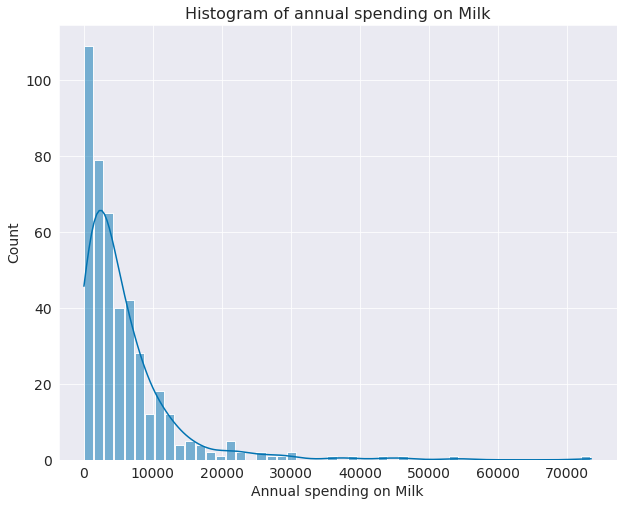

In [ ]:
# Histogram on Milk column

def histogram(var1, bins):
  plt.figure(figsize= (10,8)),
  sns.set_style('darkgrid'),
  sns.set_palette('colorblind'),
  sns.histplot(x = var1, data=df,  bins = bins , shrink= 0.9, kde = True)

histogram('Milk', 50)
plt.title('Histogram of annual spending on Milk', fontsize = 16)
plt.xlabel('Annual spending on Milk', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [ ]:
# Measures of central tendancy

df['Milk'].describe()

count      440.000000
mean      5796.265909
std       7380.377175
min         55.000000
25%       1533.000000
50%       3627.000000
75%       7190.250000
max      73498.000000
Name: Milk, dtype: float64

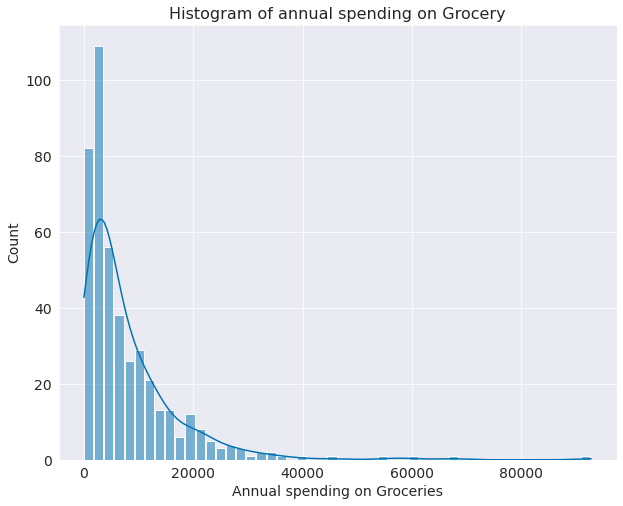

In [ ]:
# Histogram on Grocery column

def histogram(var1, bins):
  plt.figure(figsize= (10,8)),
  sns.set_style('darkgrid'),
  sns.set_palette('colorblind'),
  sns.histplot(x = var1, data=df,  bins = bins , shrink= 0.9, kde = True)

histogram('Grocery', 50)
plt.title('Histogram of annual spending on Grocery', fontsize = 16)
plt.xlabel('Annual spending on Groceries', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [ ]:
# Measures of Central Tendancy

df['Milk'].describe()

count      440.000000
mean      5796.265909
std       7380.377175
min         55.000000
25%       1533.000000
50%       3627.000000
75%       7190.250000
max      73498.000000
Name: Milk, dtype: float64

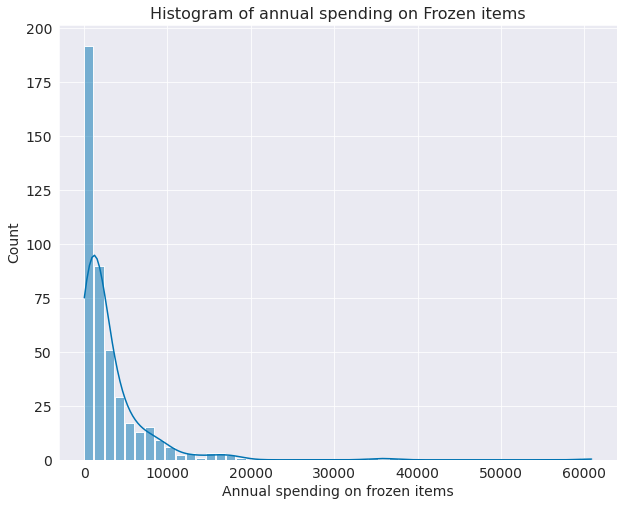

In [ ]:
# Histogram on Frozen column

def histogram(var1, bins):
  plt.figure(figsize= (10,8)),
  sns.set_style('darkgrid'),
  sns.set_palette('colorblind'),
  sns.histplot(x = var1, data=df,  bins = bins , shrink= 0.9, kde = True)

histogram('Frozen', 50)
plt.title('Histogram of annual spending on Frozen items', fontsize = 16)
plt.xlabel('Annual spending on frozen items', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [ ]:
# Measures of central tendancy

df['Frozen'].describe()

count      440.000000
mean      3071.931818
std       4854.673333
min         25.000000
25%        742.250000
50%       1526.000000
75%       3554.250000
max      60869.000000
Name: Frozen, dtype: float64

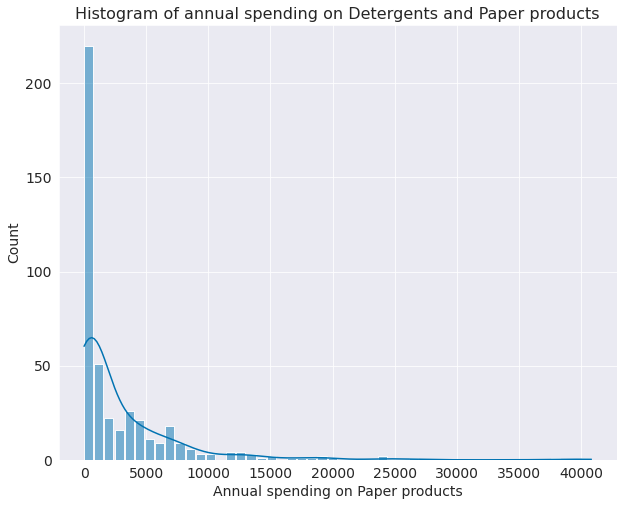

In [ ]:
# Histogram on Detergents_Paper column

def histogram(var1, bins):
  plt.figure(figsize= (10,8)),
  sns.set_style('darkgrid'),
  sns.set_palette('colorblind'),
  sns.histplot(x = var1, data=df,  bins = bins , shrink= 0.9, kde = True)

histogram('Detergents_Paper', 50)
plt.title('Histogram of annual spending on Detergents and Paper products', fontsize = 16)
plt.xlabel('Annual spending on Paper products', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [ ]:
# Measures of central tendancy

df['Detergents_Paper'].describe()

count      440.000000
mean      2881.493182
std       4767.854448
min          3.000000
25%        256.750000
50%        816.500000
75%       3922.000000
max      40827.000000
Name: Detergents_Paper, dtype: float64

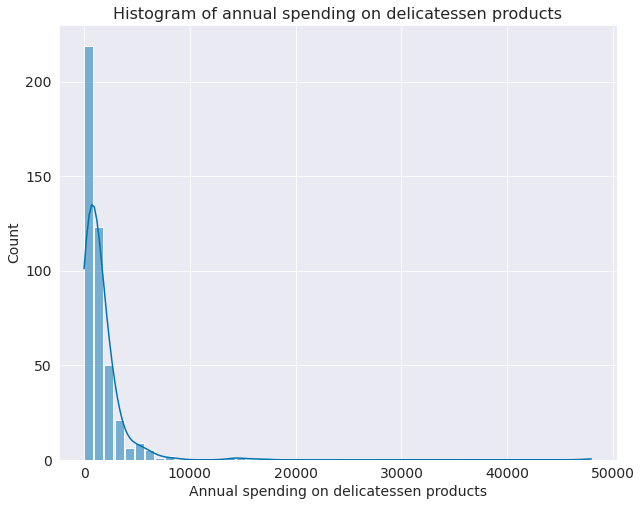

In [ ]:
# Histogram on Delicatessen column

def histogram(var1, bins):
  plt.figure(figsize= (10,8)),
  sns.set_style('darkgrid'),
  sns.set_palette('colorblind'),
  sns.histplot(x = var1, data=df,  bins = bins , shrink= 0.9, kde = True)

histogram('Delicassen', 50)
plt.title('Histogram of annual spending on delicatessen products', fontsize = 16)
plt.xlabel('Annual spending on delicatessen products', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [ ]:
# Measure of central tendancy

df['Delicassen'].describe()

count      440.000000
mean      1524.870455
std       2820.105937
min          3.000000
25%        408.250000
50%        965.500000
75%       1820.250000
max      47943.000000
Name: Delicassen, dtype: float64

### Bivariate Analysis

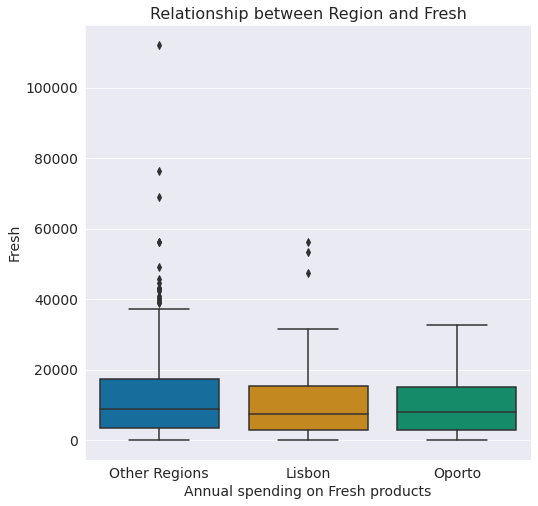

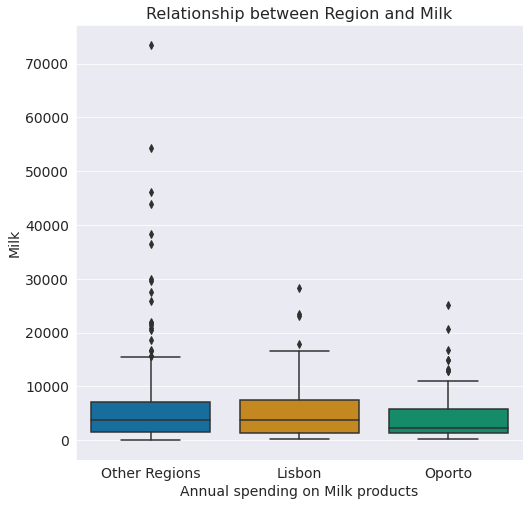

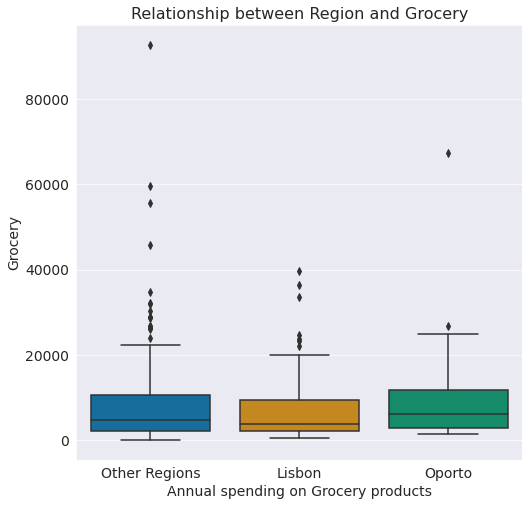

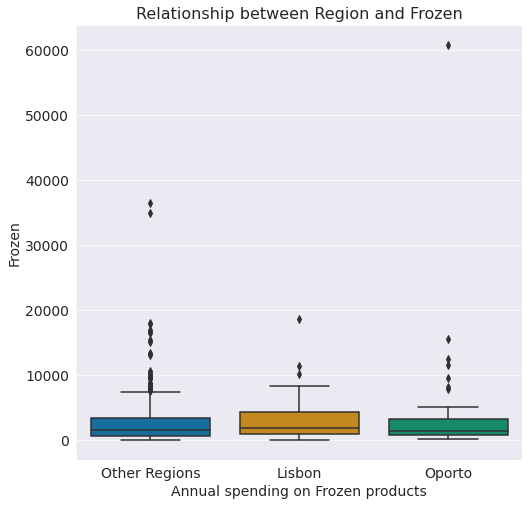

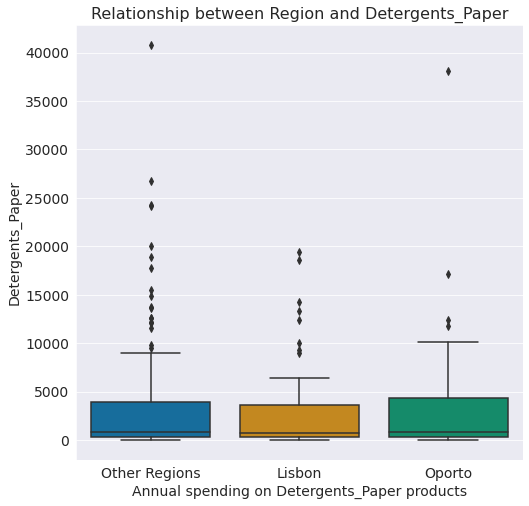

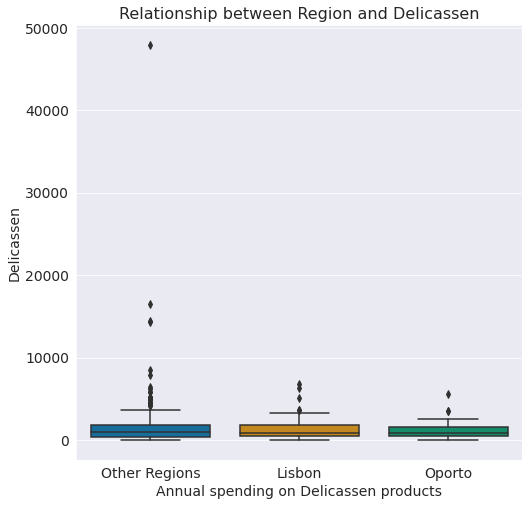

In [ ]:
# Relationship between the numerical columns and the region

cols = ['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']

for column in cols:
    plt.figure(figsize= (8,8))
    sns.boxplot(x = df['Region'], y = df[column])
    plt.xlabel('Annual spending on {} products'.format(column), fontsize = 14)
    plt.ylabel(column , fontsize = 14)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.title('Relationship between Region and {}'.format(column), fontsize = 16)

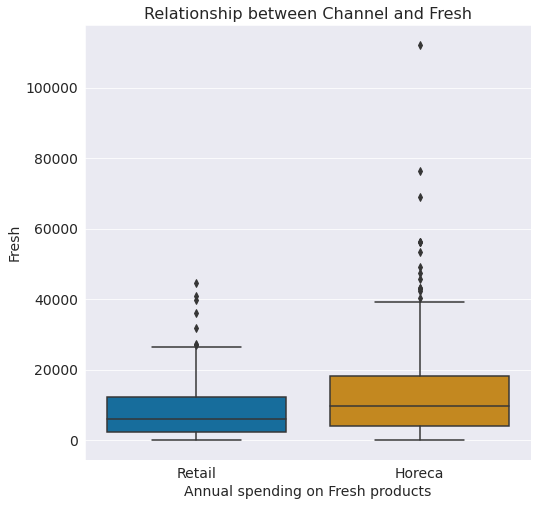

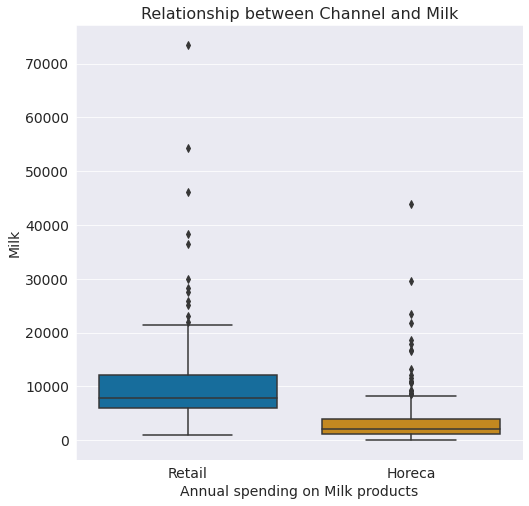

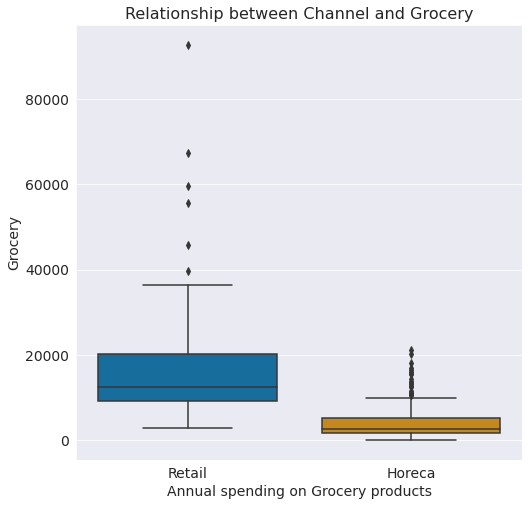

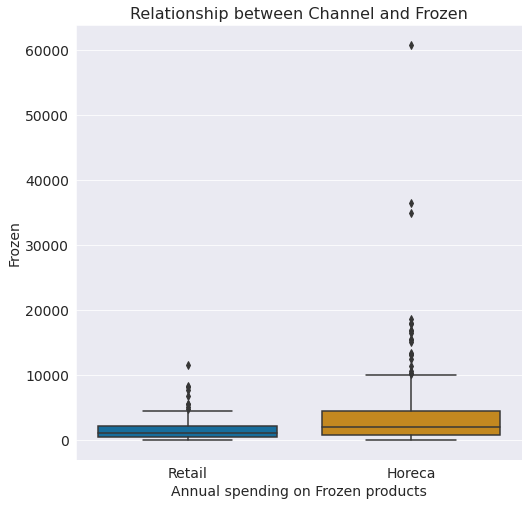

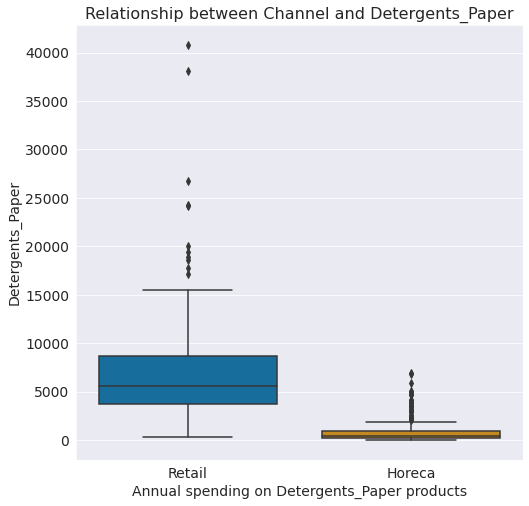

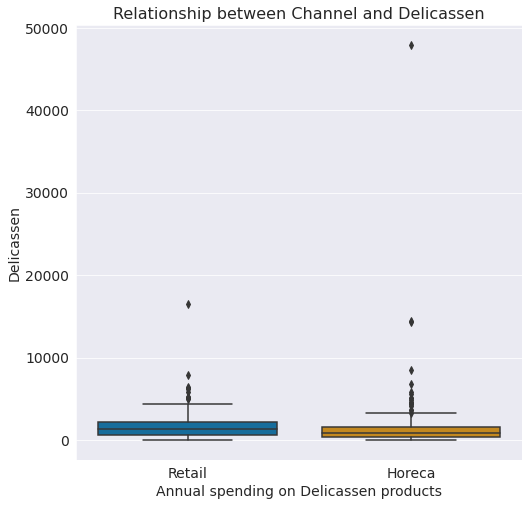

In [ ]:
# Relationship between the numerical columns and the channel

for column in cols:
    plt.figure(figsize= (8,8))
    sns.boxplot(x = df['Channel'], y = df[column])
    plt.xlabel('Annual spending on {} products'.format(column), fontsize = 14)
    plt.ylabel(column , fontsize = 14)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.title('Relationship between Channel and {}'.format(column), fontsize = 16)

In [ ]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,Retail,Other Regions,12669,9656,7561,214,2674,1338
1,Retail,Other Regions,7057,9810,9568,1762,3293,1776
2,Retail,Other Regions,6353,8808,7684,2405,3516,7844
3,Horeca,Other Regions,13265,1196,4221,6404,507,1788
4,Retail,Other Regions,22615,5410,7198,3915,1777,5185


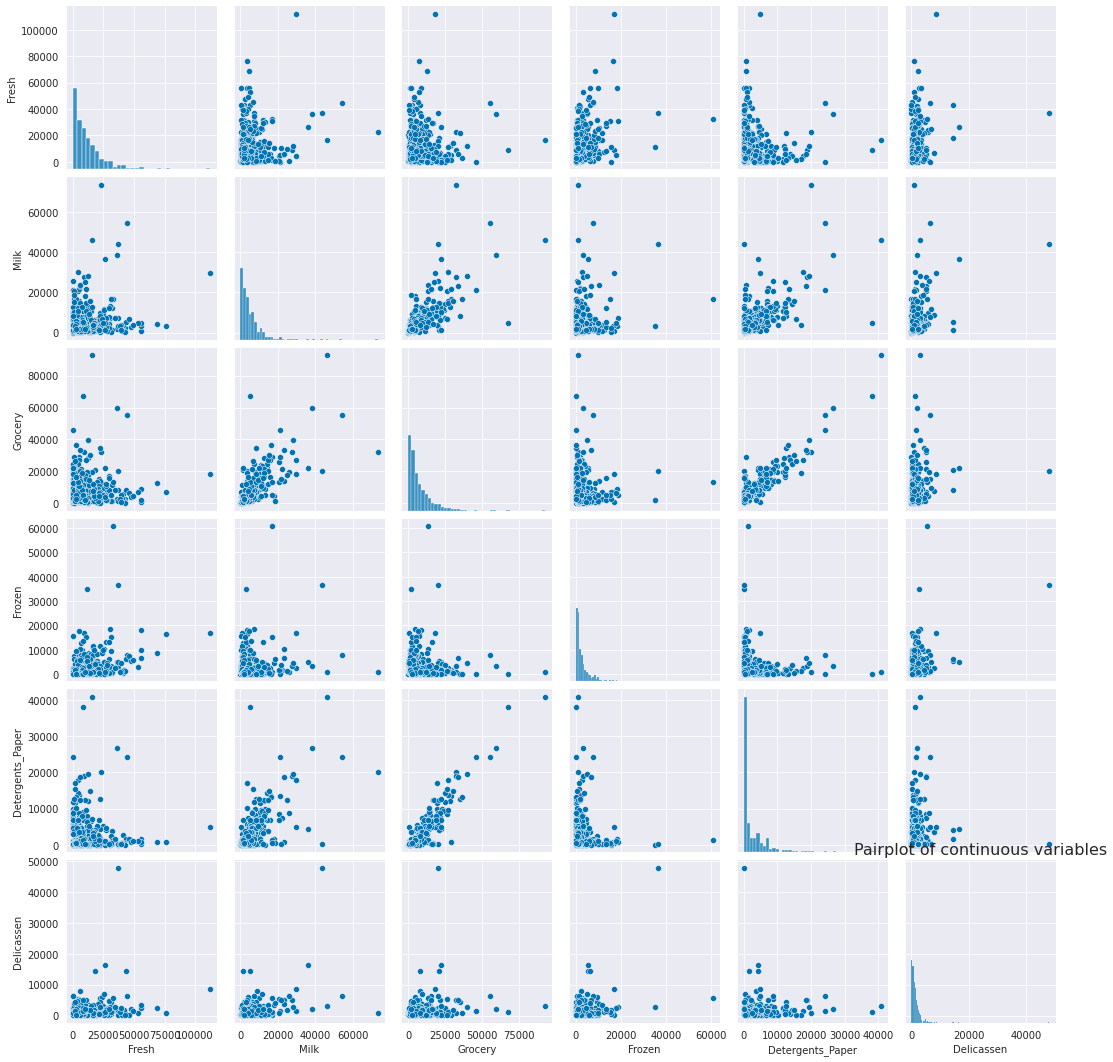

In [ ]:
# Scatterplots for the numerical columns

num = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

sns.pairplot(num, palette = 'Set2')
plt.title('Pairplot of continuous variables', fontsize = 16)
plt.show()


### Mutivariate Analysis

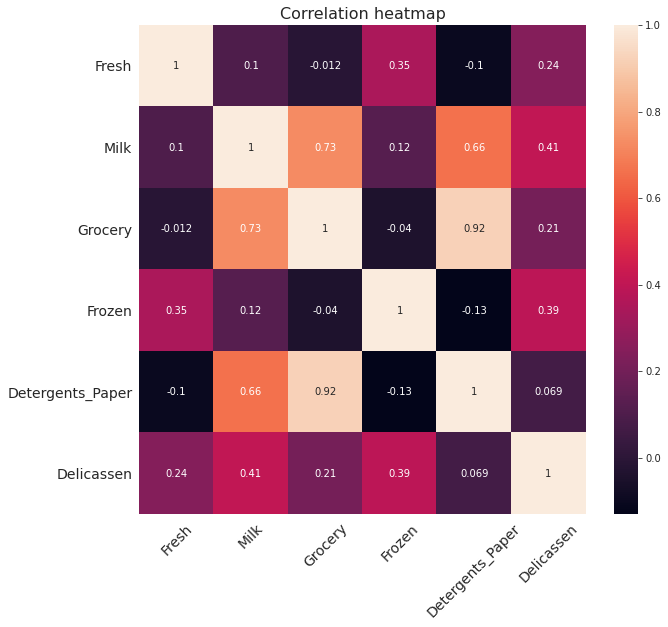

In [ ]:
# Correlation matrix 

plt.figure(figsize =(10,9))
sns.heatmap(num.corr(),annot=True)
plt.title('Correlation heatmap', fontsize = 16)
plt.xticks(fontsize = 14, rotation = 45)
plt.yticks(fontsize = 14)
plt.show()

## Data Preprocessing

### Checking for multicollinearity

In [ ]:
# Inspecting the dataset again

whole.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
# Making a copy of the dataset again

df1 = whole.copy()

In [ ]:
# Getting the correlations

correlations = df1.corr()
correlations

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [ ]:
# Creating the VIF dataframe

VIF = pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns = correlations.columns)
VIF

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.791911,-0.107251,0.183121,-0.166627,-0.297748,0.234219,-0.701029,-0.054421
Region,-0.107251,1.014571,-0.072816,-0.030362,0.027228,0.054748,0.067280,-0.041369
Fresh,0.183121,-0.072816,1.206674,-0.128695,-0.351681,-0.294728,0.384204,-0.089058
Milk,-0.166627,-0.030362,-0.128695,2.566544,-1.233101,-0.159828,-0.441274,-0.654307
Grocery,-0.297748,0.027228,-0.351681,-1.233101,8.844377,-0.109547,-7.175872,-0.674844
Frozen,0.234219,0.054748,-0.294728,-0.159828,-0.109547,1.353524,0.233966,-0.401385
Detergents_Paper,-0.701029,0.067280,0.384204,-0.441274,-7.175872,0.233966,8.379030,0.924087
Delicassen,-0.054421,-0.041369,-0.089058,-0.654307,-0.674844,-0.401385,0.924087,1.524167


In [ ]:
# Extracting the VIF values

pd.Series(np.diag(VIF), index=[VIF.columns])

# Both Grocery and Detergents_Paper columns have very high 
# VIF values indicating high correlation between the two.

Channel             1.791911
Region              1.014571
Fresh               1.206674
Milk                2.566544
Grocery             8.844377
Frozen              1.353524
Detergents_Paper    8.379030
Delicassen          1.524167
dtype: float64

In [ ]:
# Dropping the grocery column

whole.drop('Grocery', axis = 1, inplace = True)

In [ ]:
# Getting the correlations again

correlations = whole.corr()
correlations

# Creating the VIF dataframe

VIF = pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns = correlations.columns)
VIF

# Extracting the VIF values

pd.Series(np.diag(VIF), index=[VIF.columns])

# There is no multicollinearity now

Channel             1.781887
Region              1.014488
Fresh               1.192690
Milk                2.394623
Frozen              1.352167
Detergents_Paper    2.556897
Delicassen          1.472675
dtype: float64

### Normalizing the data

In [ ]:
whole.head()

,Channel,Region,Fresh,Milk,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,214,2674,1338
1,2,3,7057,9810,1762,3293,1776
2,2,3,6353,8808,2405,3516,7844
3,1,3,13265,1196,6404,507,1788
4,2,3,22615,5410,3915,1777,5185


In [ ]:
whole2 = whole.copy()

In [ ]:
whole.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Frozen', 'Detergents_Paper',
       'Delicassen'],
      dtype='object')

In [ ]:
# Normalizing the data

# Assuming same lines from your example
cols_to_norm = ['Channel', 'Region', 'Fresh', 'Milk', 'Frozen', 'Detergents_Paper','Delicassen']
whole[cols_to_norm] = whole[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
whole.head()

,Channel,Region,Fresh,Milk,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.063934,0.043455,0.108093


In [ ]:
df2 = whole.copy()

## Modelling

In [ ]:
# Determining the optimal number of clusters

cluster_range = range(1,10)
cluster_wss=[] 
for cluster in cluster_range:
    model = KMeans(cluster)
    model.fit(whole)
    cluster_wss.append(model.inertia_)

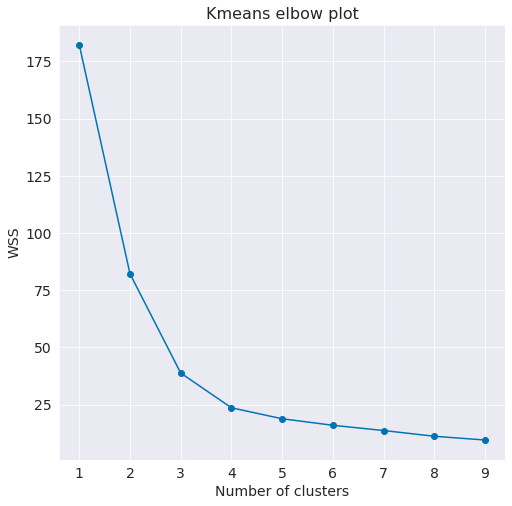

In [ ]:
# Plotting the elbow plot

plt.figure(figsize=(8,8))
plt.title('Kmeans elbow plot', fontsize = 16)
plt.xlabel('Number of clusters', fontsize = 14)
plt.ylabel('WSS', fontsize =14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.plot(list(cluster_range),cluster_wss,marker='o')
plt.show()

# According to the elbow plot the optimal number of clusters is four

In [ ]:
# Getting the optimal number of clusters using the silhouette method

score = {}
from sklearn.metrics import silhouette_score
for n in range(10, 1, -1):
    clusterer = KMeans(n_clusters=n, random_state=0).fit(whole)
    preds = clusterer.predict(whole)
    centers = clusterer.cluster_centers_
    score_n = silhouette_score(whole, preds, metric='euclidean')
    print('Silhouette score for {} clusters: {}'.format(n, score_n))
    score[n] = silhouette_score(whole, preds, metric='euclidean')

# The maximum silhouette score is 0.694 where the clusters are 4 in number.

Silhouette score for 10 clusters: 0.5999175474649363
Silhouette score for 9 clusters: 0.5997062177455774
Silhouette score for 8 clusters: 0.6107367109414882
Silhouette score for 7 clusters: 0.6104176431500784
Silhouette score for 6 clusters: 0.6660901426363959
Silhouette score for 5 clusters: 0.6644126757311436
Silhouette score for 4 clusters: 0.6942420858950941
Silhouette score for 3 clusters: 0.6696583775824035
Silhouette score for 2 clusters: 0.5980813313669483


In [ ]:
# Building the k means model

model = KMeans(n_clusters=4,random_state=0)
model.fit(whole)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
# Checking on the original dataset

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,Retail,Other Regions,12669,9656,7561,214,2674,1338
1,Retail,Other Regions,7057,9810,9568,1762,3293,1776
2,Retail,Other Regions,6353,8808,7684,2405,3516,7844
3,Horeca,Other Regions,13265,1196,4221,6404,507,1788
4,Retail,Other Regions,22615,5410,7198,3915,1777,5185


In [ ]:
df_origi = df.copy()

In [ ]:
# Dropping the Grocery column 

df.drop('Grocery', axis = 1, inplace = True)
df.head()

,Channel,Region,Fresh,Milk,Frozen,Detergents_Paper,Delicassen
0,Retail,Other Regions,12669,9656,214,2674,1338
1,Retail,Other Regions,7057,9810,1762,3293,1776
2,Retail,Other Regions,6353,8808,2405,3516,7844
3,Horeca,Other Regions,13265,1196,6404,507,1788
4,Retail,Other Regions,22615,5410,3915,1777,5185


In [ ]:
# Having the original dataset with the clusters assigned to it

df['cluster']=model.predict(whole)
df.head()

,Channel,Region,Fresh,Milk,Frozen,Detergents_Paper,Delicassen,cluster
0,Retail,Other Regions,12669,9656,214,2674,1338,1
1,Retail,Other Regions,7057,9810,1762,3293,1776,1
2,Retail,Other Regions,6353,8808,2405,3516,7844,1
3,Horeca,Other Regions,13265,1196,6404,507,1788,2
4,Retail,Other Regions,22615,5410,3915,1777,5185,1


In [ ]:
whole.head()

,Channel,Region,Fresh,Milk,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.063934,0.043455,0.108093


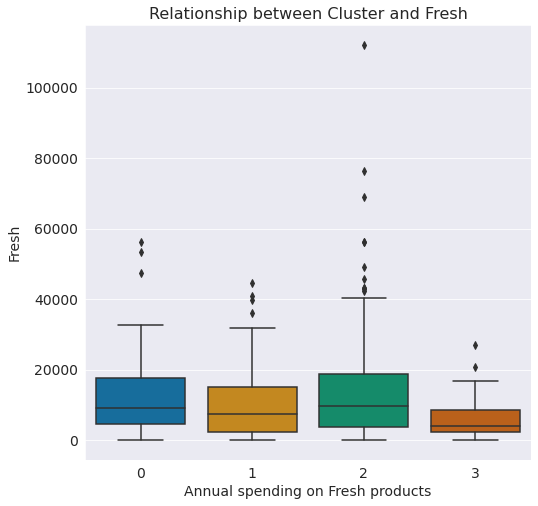

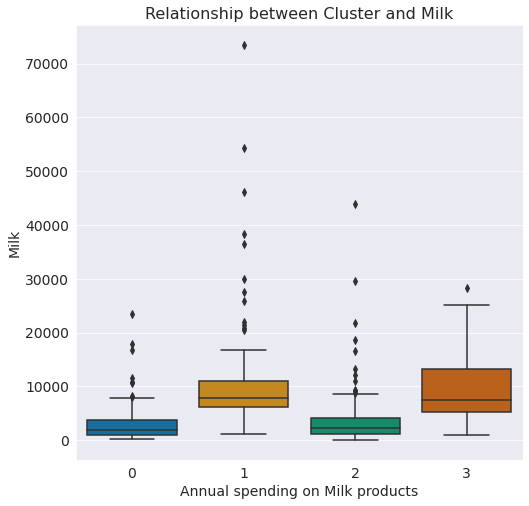

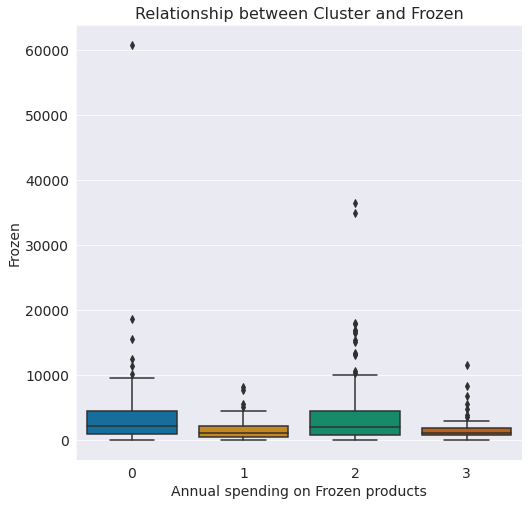

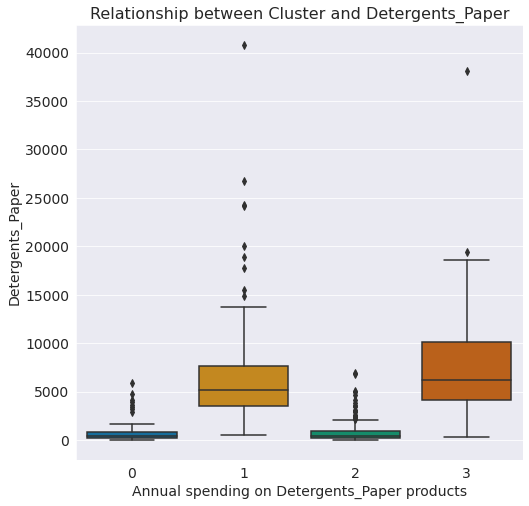

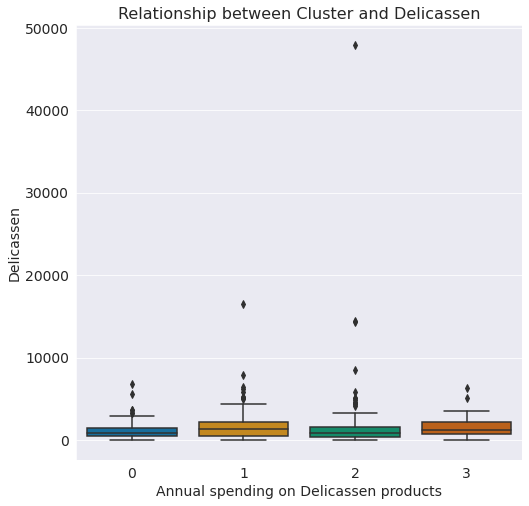

In [ ]:
# Conducting some further EDA
# Visualizing the relationship between cluster and the continuous variables

cols = ['Fresh', 'Milk', 'Frozen','Detergents_Paper', 'Delicassen']

for column in cols:
    plt.figure(figsize= (8,8))
    sns.boxplot(x = df['cluster'], y = df[column])
    plt.xlabel('Annual spending on {} products'.format(column), fontsize = 14)
    plt.ylabel(column , fontsize = 14)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.title('Relationship between Cluster and {}'.format(column), fontsize = 16)
    plt.show()
    print('\n'*2)

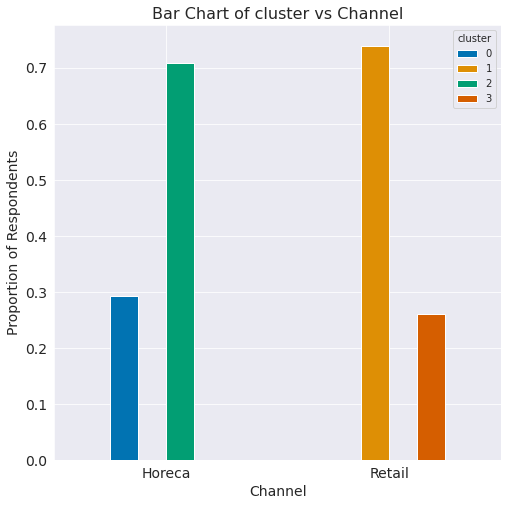

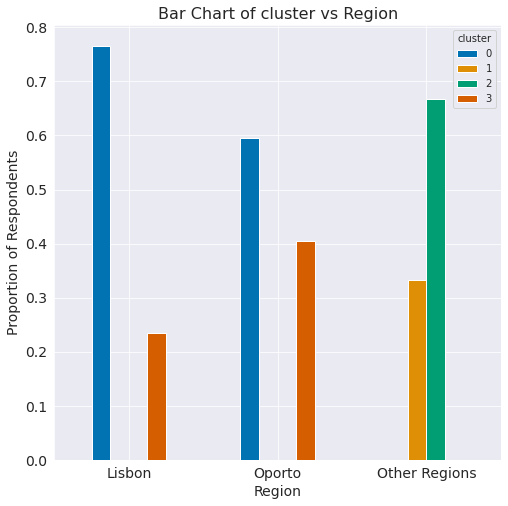

In [ ]:
# Visualizing the relationship between cluster and the categorical variables

qcol1 = ['Channel', 'Region']

for i in qcol1:
  table=pd.crosstab(df[i],df['cluster'])
  table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize = (8,8), stacked=False)
  plt.title('Bar Chart of cluster vs {}'.format(i), fontsize = 16)
  plt.xlabel(i, fontsize = 14)
  plt.ylabel('Proportion of Respondents', fontsize = 14)
  plt.xticks(rotation = 360, fontsize = 14)
  plt.yticks(fontsize = 14)
  plt.show()
  print('\n'*2)

In [ ]:
# Getting the number of wholesale customers per cluster

df['cluster'].value_counts()

2    211
1    105
0     87
3     37
Name: cluster, dtype: int64

## Deploying the model

In [ ]:
# saving the model 
import pickle 

pickle_out = open("kmeans_whole.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()

In [ ]:
# !pip install ipykernel>=5.1.2
# !pip install pydeck

In [ ]:
# PY
# !pip install streamlit
# !pip install pyngrok

In [ ]:
# Basic installations

# !pip install -q pyngrok
# !pip install -q streamlit
# !pip install -q streamlit_ace

In [ ]:
import streamlit as st

In [ ]:
# %%writefile app.py
 
# import pickle
# import streamlit as st
 
# # loading the trained model
# pickle_in = open('kmeans_whole.pkl', 'rb') 
# kmeans = pickle.load(pickle_in)

In [ ]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Frozen', 'Detergents_Paper',
       'Delicassen', 'cluster'],
      dtype='object')

In [ ]:
%%writefile app.py
 
import pickle
import streamlit as st
 
# loading the trained model
pickle_in = open('kmeans_whole.pkl', 'rb') 
kmeans = pickle.load(pickle_in)

@st.cache()

# defining the function which will make the prediction using the data which the user inputs 
def prediction(Channel, Region, Fresh, Milk, Frozen, Detergents_Paper,Delicassen):   
 
    # Pre-processing user input    
    if Region == "Lisbon":
        Region = 1
    elif Region == "Oporto":
        Region = 2
    else:
        Region = 3
 
    if Channel == "Horeca":
        Channel = 1
    else:
        Channel = 2 
 
    Fresh = Fresh / 1000
    Milk = Milk / 1000
    Frozen = Frozen / 1000
    Detergents_Paper = Detergents_Paper / 1000
    Delicassen = Delicassen / 1000
 
    # Making predictions 
    prediction = kmeans.predict( 
        [[Channel, Region, Fresh, Milk, Frozen, Detergents_Paper,Delicassen]])
    if prediction == 0:
        pred = 'Horeca and Lisbon'
    elif prediction == 1:
        pred = 'Retail and Other Regions'
    elif prediction == 2:
        pred = 'Horeca and Other Regions'
    else:
        pred = 'Retail and Oporto'
    return pred
      
  


Overwriting app.py


In [ ]:
# this is the main function in which we define our webpage  
def main():       
    # front end elements of the web page 
    html_temp = """ 
    <div style ="background-color:yellow;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Wholesale Customer Segmentation Analysis</h1> 
    </div> 
    """
      
    # display the front end aspect
    st.markdown(html_temp, unsafe_allow_html = True) 
      
    # following lines create boxes in which user can enter data required to make prediction 
    Region = st.selectbox('Region',("Lisbon","Oporto", "Other Regions"))
    Channel = st.selectbox('Channel',("Horeca","Retail")) 
    Fresh = st.number_input("Annual spending on fresh products")
    Milk = st.number_input("Annual spending on dairy products") 
    Frozen = st.number_input("Annual spending on frozen products")
    Detergents_Paper = st.number_input("Annual spending on detergents and paper products")
    Delicassen = st.number_input("Annual spending on delicassen products")
    result =""
      
    # when 'Predict' is clicked, make the prediction and store it 
    if st.button("Predict"): 
        result = prediction(Channel, Region, Fresh, Milk, Frozen, Detergents_Paper,Delicassen) 
        st.success('Your cluster is {}'.format(result))
    if st.button("About"):
        st.text("A project by the Peak Performers")
        st.text("Project week")
     
if __name__=='__main__': 
    main()

2021-06-10 12:14:07.636 WARNING root: 
  command:

    streamlit run /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py [ARGUMENTS]


In [ ]:
!streamlit run app.py --server.port=80 &>/dev/null&

In [ ]:
# !nohub streamlit run app.py &

/bin/bash: nohub: command not found


In [ ]:
!ls

'=5.1.2'   kmeans_whole.pkl  'Wholesale customers data.csv'
 app.py    sample_data


In [ ]:
from pyngrok import ngrok
 
public_url = ngrok.connect('8501')
public_url

2021-06-10 12:15:27.528 INFO    pyngrok.ngrok: Opening tunnel named: http-8501-67830d39-b1cb-4a9b-bf9d-a39dcbceb1a1
2021-06-10 12:15:27.575 INFO    pyngrok.process.ngrok: t=2021-06-10T12:15:27+0000 lvl=info msg="no configuration paths supplied"
2021-06-10 12:15:27.578 INFO    pyngrok.process.ngrok: t=2021-06-10T12:15:27+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
2021-06-10 12:15:27.584 INFO    pyngrok.process.ngrok: t=2021-06-10T12:15:27+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngrok.yml err=nil
2021-06-10 12:15:27.602 INFO    pyngrok.process.ngrok: t=2021-06-10T12:15:27+0000 lvl=info msg="starting web service" obj=web addr=127.0.0.1:4040
2021-06-10 12:15:27.738 INFO    pyngrok.process.ngrok: t=2021-06-10T12:15:27+0000 lvl=info msg="tunnel session started" obj=tunnels.session
2021-06-10 12:15:27.744 INFO    pyngrok.process.ngrok: t=2021-06-10T12:15:27+0000 lvl=info msg="client session established" obj=csess id=0a155729531f

<NgrokTunnel: "http://424836b2486a.ngrok.io" -> "http://localhost:8501">

## Conclusions

Based on the analysis done, the following are our conclusions:

Cluster 0 has high spending on fresh produce, low spending on dairy products, relatively low spending on frozen produce, low Detergents and Paper spending and low spending on Delicatessens. They are Hotel/Restaurant/Cafe customers located in Lisbon

Cluster 1 has medium spending on fresh produce, high spending on dairy products, low spending on frozen produce, high Detergents and Paper spending and low spending on Delicatessens. They are Retail customers located in Other Regions

Cluster 2 has high spending on fresh produce, low spending on dairy products, medium spending on frozen produce, low Detergents and Paper spending and low spending on Delicatessens. They are Hotel/Restaurant/Cafe customers located in Other Regions

Cluster 3 has low spending on fresh produce, high spending on dairy products, low spending on frozen produce, high Detergents and Paper spending and low spending on Delicatessens. They are Retail customers located in Oporto

## Recommendations